In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [4]:
os.chdir('C:\\Users\\tommc\\OneDrive\\Documents\\GitHub\\Baseball')
os.listdir()

['366_800020_bundle_archive', 'clean_data.xlsx', 'final_clean_data.xlsx']

In [5]:
data = pd.read_excel('final_clean_data.xlsx')

In [6]:
data

Unnamed: 0   playerID  yearID   AB   H  2B  3B  HR  SO  BB  total_hits  \
0               0   addybo01    1873  118  32   6   0   0   0   4          38   
1               1   addybo01    1873   51  16   1   0   0   0   2          17   
2               2   addybo01    1874  152  54   5   2   1   0   1          62   
3               3   addybo01    1875  213  51   9   2   0   0   1          62   
4               4   addybo01    1876  310  80   8   4   0   2   0          92   
...           ...        ...     ...  ...  ..  ..  ..  ..  ..  ..         ...   
41457       41457  peralwi01    2014   50   7   0   0   0  20   1           7   
41458       41458  perezju02    2014   89  23   5   0   1  21   6          29   
41459       41459  pintojo01    2014   76  26   5   0   4  22   6          35   
41460       41460  sanchto01    2014   60  14   4   0   2  14   3          20   
41461       41461  valaich01    2014   64  14   5   0   1  16   3          20   

             BA  birthYear  age  last year BA  Last season league avg  \
0      0.333333       1842   31      0.322034                0.328734   
1      0.407895       1842   31      0.333333                0.328734   
2      0.291080       1842   32      0.407895                0.310390   
3      0.296774       1842   33      0.291080                0.277332   
4      0.316901       1842   34      0.296774                0.297497   
...         ...        ...  ...           ...                     ...   
41457  0.087719       1989   25      0.140000                0.310405   
41458  0.250000       1986   28      0.325843                0.310405   
41459  0.307692       1989   25      0.460526                0.310405   
41460  0.306667       1988   26      0.333333                0.310405   
41461  0.289256       1985   29      0.312500                0.310405   

       career BA  
0       0.323990  
1       0.323990  
2       0.323990  
3       0.323990  
4       0.323990  
...          ...  
41457   0.087719  
41458   0.250000  
41459   0.307692  
41460   0.306667  
41461   0.289256  

[41462 rows x 17 columns]

In [7]:
data.columns

Index(['Unnamed: 0', 'playerID', 'yearID', 'AB', 'H', '2B', '3B', 'HR', 'SO',
       'BB', 'total_hits', 'BA', 'birthYear', 'age', 'last year BA',
       'Last season league avg', 'career BA'],
      dtype='object')

In [8]:
data = data.drop('Unnamed: 0',axis=1)

In [9]:
data

playerID  yearID   AB   H  2B  3B  HR  SO  BB  total_hits        BA  \
0       addybo01    1873  118  32   6   0   0   0   4          38  0.333333   
1       addybo01    1873   51  16   1   0   0   0   2          17  0.407895   
2       addybo01    1874  152  54   5   2   1   0   1          62  0.291080   
3       addybo01    1875  213  51   9   2   0   0   1          62  0.296774   
4       addybo01    1876  310  80   8   4   0   2   0          92  0.316901   
...          ...     ...  ...  ..  ..  ..  ..  ..  ..         ...       ...   
41457  peralwi01    2014   50   7   0   0   0  20   1           7  0.087719   
41458  perezju02    2014   89  23   5   0   1  21   6          29  0.250000   
41459  pintojo01    2014   76  26   5   0   4  22   6          35  0.307692   
41460  sanchto01    2014   60  14   4   0   2  14   3          20  0.306667   
41461  valaich01    2014   64  14   5   0   1  16   3          20  0.289256   

       birthYear  age  last year BA  Last season league avg  career BA  
0           1842   31      0.322034                0.328734   0.323990  
1           1842   31      0.333333                0.328734   0.323990  
2           1842   32      0.407895                0.310390   0.323990  
3           1842   33      0.291080                0.277332   0.323990  
4           1842   34      0.296774                0.297497   0.323990  
...          ...  ...           ...                     ...        ...  
41457       1989   25      0.140000                0.310405   0.087719  
41458       1986   28      0.325843                0.310405   0.250000  
41459       1989   25      0.460526                0.310405   0.307692  
41460       1988   26      0.333333                0.310405   0.306667  
41461       1985   29      0.312500                0.310405   0.289256  

[41462 rows x 16 columns]

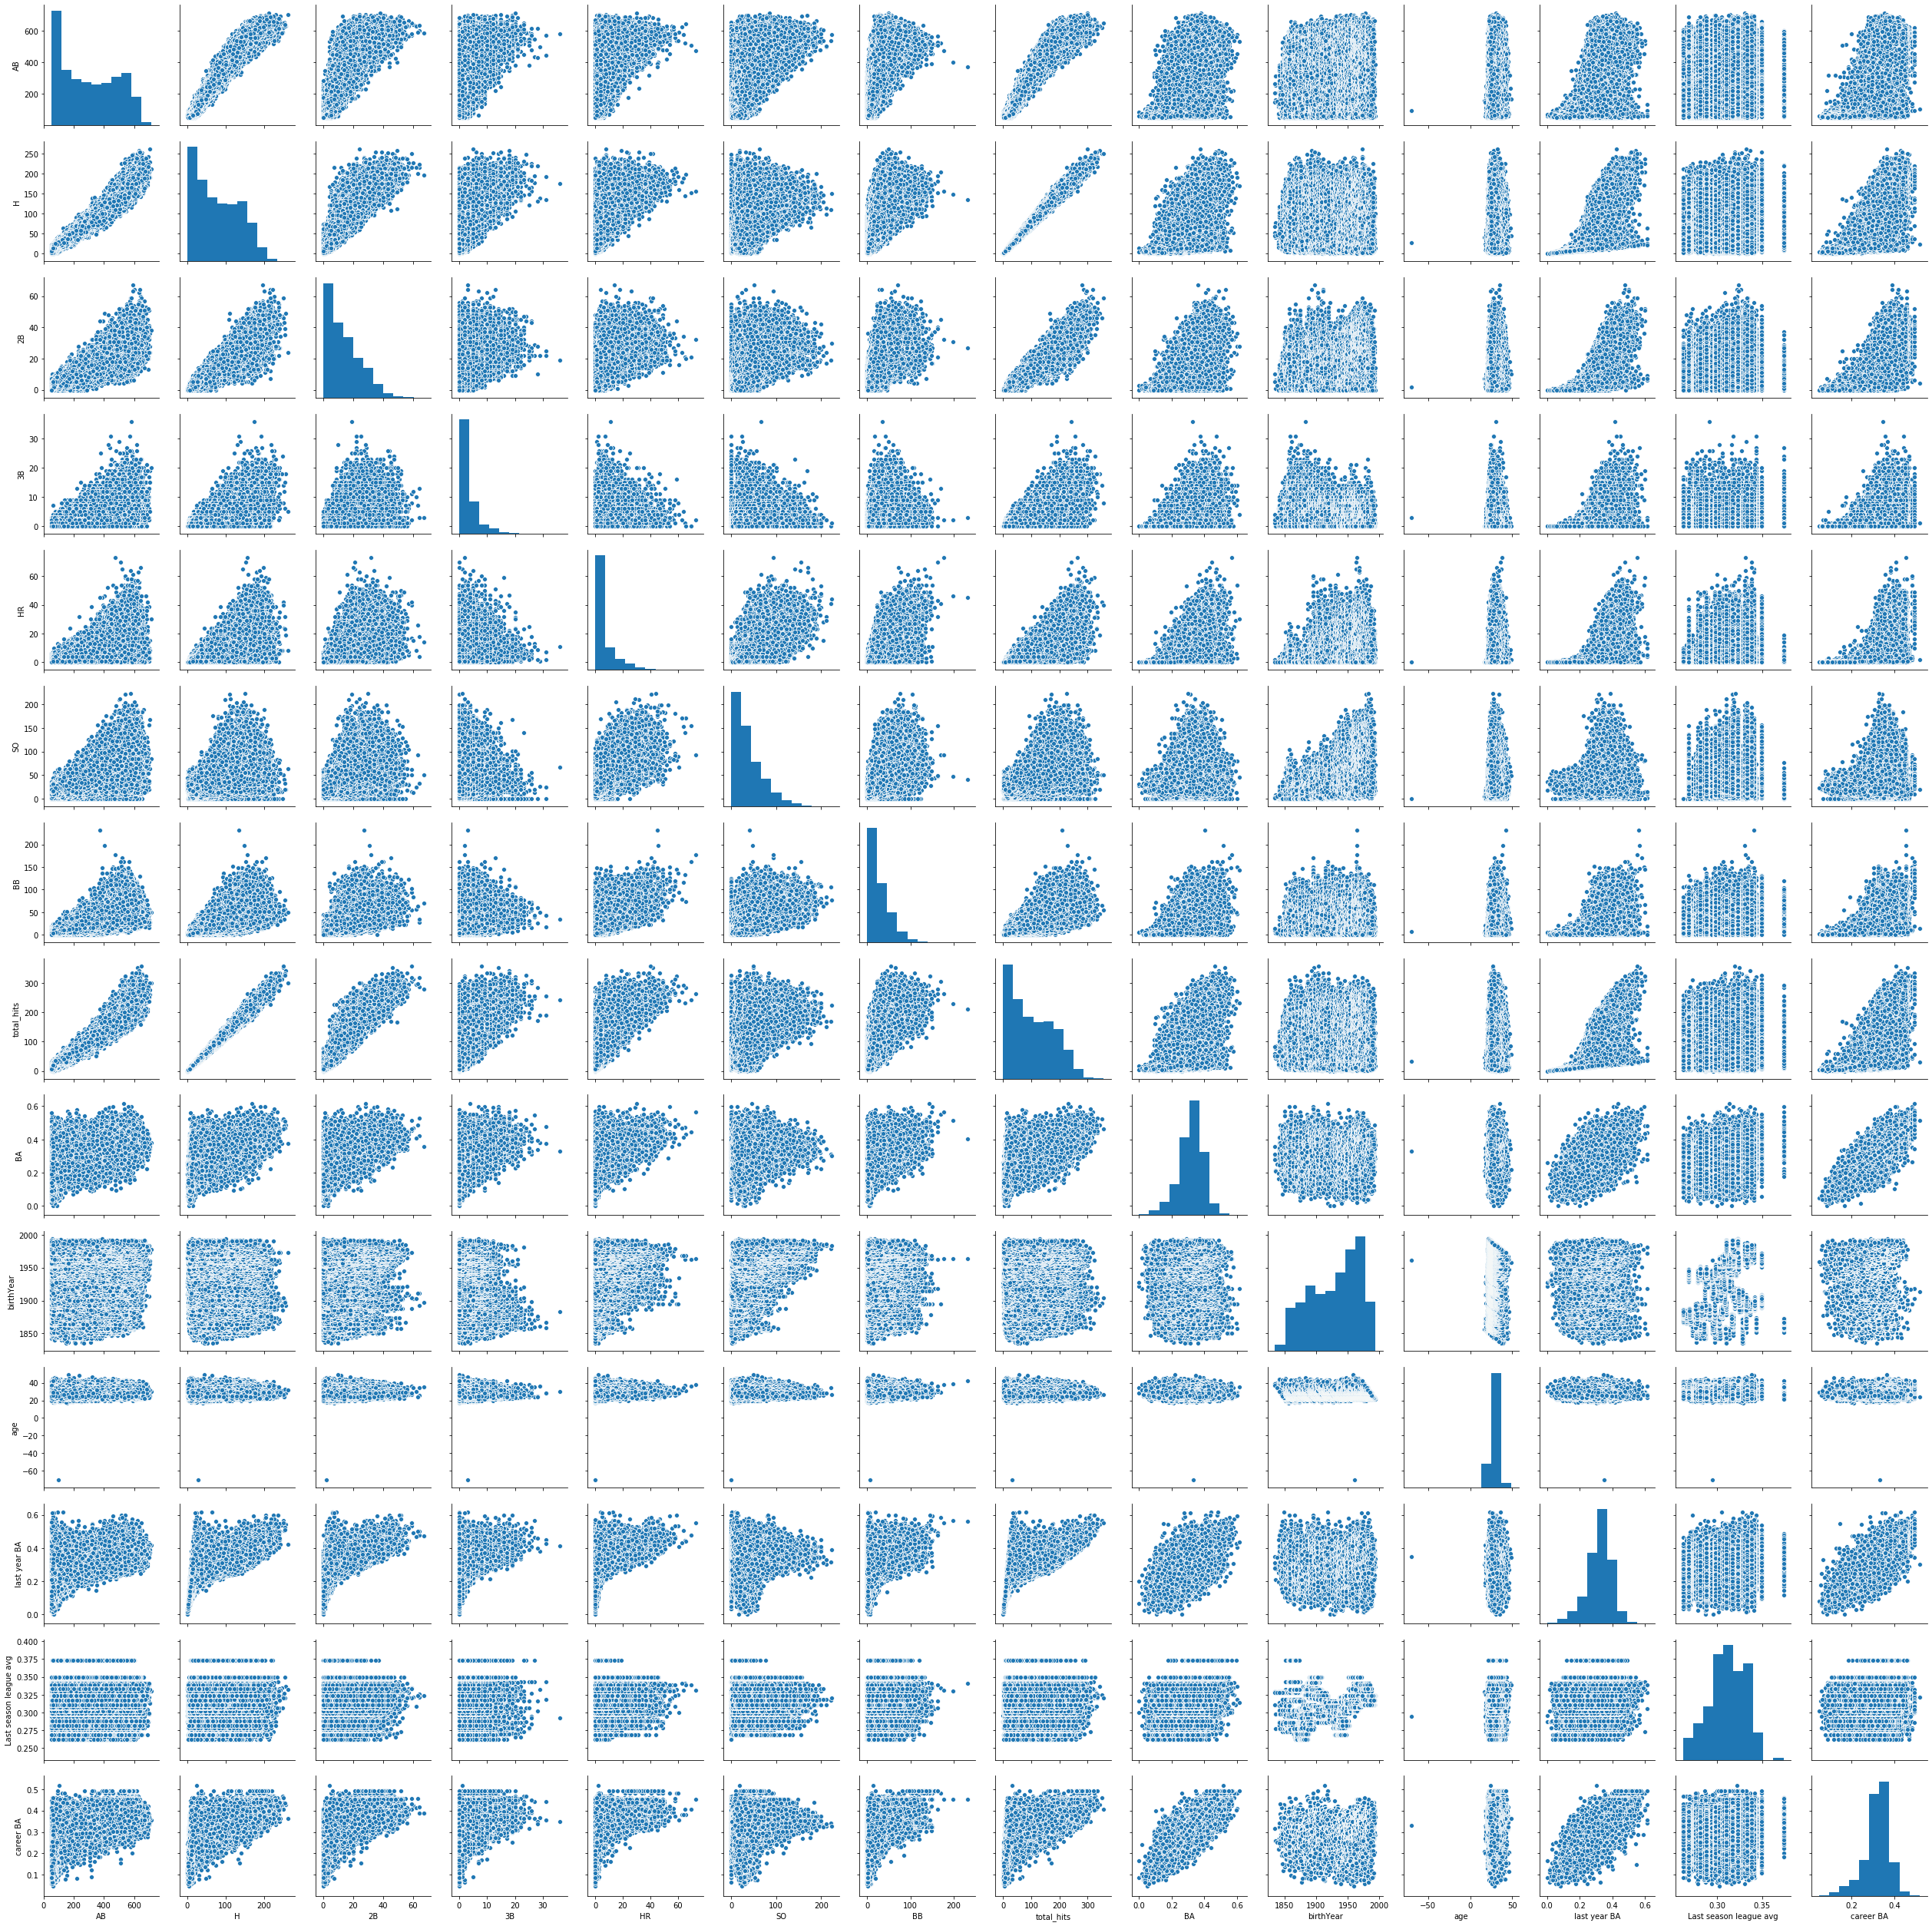

In [10]:
sns.pairplot(data.drop(['playerID','yearID'],axis=1))

In [11]:
X = data.drop(['playerID','BA','yearID','birthYear','Last season league avg'],axis=1)
y = data.BA
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=1)

In [13]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [14]:
y_pred = model.predict(X_test)

In [15]:
explained_variance_score(y_test,y_pred)

0.6502427818724388

In [16]:
mean_absolute_error(y_test,y_pred)

0.03387496897766252

In [17]:
lm.intercept_

0.3173539115002647

In [18]:
df_model = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'],)

In [19]:
df_model.sort_values(by='Coefficient',ascending=False)

Coefficient
total_hits    1.300134e+11
H             9.886025e+10
2B            1.933297e+10
HR            1.497992e+10
3B            6.160777e+09
career BA     5.883697e-02
AB            1.640238e-02
age           6.766815e-03
last year BA  4.906213e-03
SO            1.825172e-03
BB            5.261403e-04

In [20]:
X_train2 = data[data['yearID']<=2005]

In [21]:
y_train2 = X_train2['BA']

In [22]:
X_train2 = X_train2.drop(['playerID','BA','yearID','Last season league avg','birthYear'],axis =1)

In [23]:
X_train2

AB   H  2B  3B  HR  SO  BB  total_hits  age  last year BA  career BA
0      118  32   6   0   0   0   4          38   31      0.322034   0.323990
1       51  16   1   0   0   0   2          17   31      0.333333   0.323990
2      152  54   5   2   1   0   1          62   32      0.407895   0.323990
3      213  51   9   2   0   0   1          62   33      0.291080   0.323990
4      310  80   8   4   0   2   0          92   34      0.296774   0.323990
...    ...  ..  ..  ..  ..  ..  ..         ...  ...           ...        ...
38612   55  13   2   0   0  13   4          15   29      0.272727   0.276766
38619   70  15   2   1   0  26   1          18   29      0.257143   0.257143
38620  290  76  11   3  16  85  30         106   26      0.365517   0.373385
38630  263  77  17   1  14  40  14         109   23      0.414449   0.402631
38641  208  54  11   0   7  45  33          72   26      0.346154   0.379594

[36696 rows x 11 columns]

In [24]:
X_train2.columns

Index(['AB', 'H', '2B', '3B', 'HR', 'SO', 'BB', 'total_hits', 'age',
       'last year BA', 'career BA'],
      dtype='object')

In [25]:
y_train2

0        0.333333
1        0.407895
2        0.291080
3        0.296774
4        0.316901
           ...   
38612    0.261194
38619    0.257143
38620    0.326409
38630    0.427826
38641    0.379747
Name: BA, Length: 36696, dtype: float64

In [26]:
X_test2 = data[data['yearID']>2005]

In [27]:
y_test2 = X_test2['BA']

In [28]:
X_test2 = X_test2.drop(['playerID','BA','yearID','Last season league avg','birthYear'],axis =1)

In [29]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4766 entries, 29076 to 41461
Data columns (total 11 columns):
AB              4766 non-null int64
H               4766 non-null int64
2B              4766 non-null int64
3B              4766 non-null int64
HR              4766 non-null int64
SO              4766 non-null int64
BB              4766 non-null int64
total_hits      4766 non-null int64
age             4766 non-null int64
last year BA    4766 non-null float64
career BA       4766 non-null float64
dtypes: float64(2), int64(9)
memory usage: 446.8 KB


In [30]:
X_test2

AB    H  2B  3B  HR  SO   BB  total_hits  age  last year BA  career BA
29076  233   64  12   1   9  57   27          86   48      0.369099   0.361745
29077  165   45  10   0   2  49   13          57   49      0.345455   0.361745
30233  373  135  27   3  45  41  232         210   42      0.563003   0.452456
30234  367   99  23   0  26  51  115         148   43      0.403270   0.452456
30979   60    5   1   0   0  25    3           6   45      0.100000   0.116241
...    ...  ...  ..  ..  ..  ..  ...         ...  ...           ...        ...
41457   50    7   0   0   0  20    1           7   25      0.140000   0.087719
41458   89   23   5   0   1  21    6          29   28      0.325843   0.250000
41459   76   26   5   0   4  22    6          35   25      0.460526   0.307692
41460   60   14   4   0   2  14    3          20   26      0.333333   0.306667
41461   64   14   5   0   1  16    3          20   29      0.312500   0.289256

[4766 rows x 11 columns]

In [31]:
y_test2

29076    0.345455
29077    0.220000
30233    0.403270
30234    0.400000
30979    0.150685
           ...   
41457    0.087719
41458    0.250000
41459    0.307692
41460    0.306667
41461    0.289256
Name: BA, Length: 4766, dtype: float64

In [32]:
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X_train2,y_train2)

In [33]:
y_pred2 = model2.predict(X_test2)

In [34]:
explained_variance_score(y_test2,y_pred2)

0.6008203154435922

In [35]:
mean_absolute_error(y_test2,y_pred2)

0.03327646045945943

In [36]:
lm2.intercept_

0.06648874784140696

In [37]:
df_model2 = pd.DataFrame(abs(lm2.coef_), X.columns, columns=['Coefficient'],)

In [38]:
df_model2.sort_values(by='Coefficient',ascending=False)

Coefficient
career BA        0.988649
last year BA     0.069802
age              0.001520
total_hits       0.000353
HR               0.000199
3B               0.000193
AB               0.000097
H                0.000048
SO               0.000039
BB               0.000018
2B               0.000010

In [39]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10)

In [44]:
X_train3,X_test3,y_train3,y_test3 = X_train2,X_test2,y_train2,y_test2

In [45]:
model.fit(X_train3,y_train3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
y_pred3 = model.predict(X_test3)

In [48]:
explained_variance_score(y_test3,y_pred3)

0.5513542363853412

In [49]:
mean_absolute_error(y_test3,y_pred3)

0.035682332708046834

In [60]:
RFmodel2 = RandomForestRegressor(n_estimators=10,max_depth=3)

In [61]:
RFmodel2.fit(X_train3,y_train3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [62]:
y_predRF = RFmodel2.predict(X_test3)

In [63]:
explained_variance_score(y_test3,y_predRF)

0.5657897973711576

In [64]:
mean_absolute_error(y_test3,y_predRF)

0.0348821178392298

In [67]:
RFmodel2.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])